# Exercise H8.2:   Variability of classification

## Generate data

In [11]:
N = 2

mu1 = (0, 1)
mu2 = (1, 0)

cov = 2 * np.identity(2)

In [24]:
import numpy as np


def generate_data_points(p):
    X1 = np.random.multivariate_normal(mu1, cov, p // 2).T
    X2 = np.random.multivariate_normal(mu2, cov, p // 2).T

    y1 = np.full(p // 2, 1)
    y2 = np.full(p // 2, -1)
    return np.hstack([X1, X2]), np.hstack([y1, y2])

In [25]:
generate_data_points(6)

(array([[-3.82364346e-04, -1.77496245e+00,  1.55009156e+00,
          1.98564726e+00,  2.45250036e+00, -5.20567856e-01],
        [-2.05658270e+00,  1.41595537e+00,  9.57142770e-01,
          1.01555274e+00,  6.53551859e-01,  6.07083367e-02]]),
 array([ 1,  1,  1, -1, -1, -1]))

In [38]:
def find_optimal_weights(X, y):
    Xb = np.vstack([np.full(X.shape[1], 1), X])
    return np.linalg.inv(Xb @ Xb.T) @ Xb @ y.T

In [39]:
find_optimal_weights(*generate_data_points(6))

array([-0.07634533, -0.34659784,  0.3428053 ])

In [45]:
def predict_label(x, w):
    xb = np.array([1, *x])
    return np.sign(w @ xb)

In [46]:
X, y = generate_data_points(6)
w = find_optimal_weights(X, y)
predict_label(np.array([0.5, 1]), w)

-1.0

In [47]:
P = [3, 4, 6, 8, 10, 20, 40, 100]

In [56]:
p_test = 1000

Mean_acc_train = []
Mean_acc_test = []
Std_acc_train = []
Std_acc_test = []
for p in P:
    Acc_train = []
    Acc_test = []
    for i in range(50):
        X, y = generate_data_points(p)
        w = find_optimal_weights(X, y)
        X_test, y_test = generate_data_points(p_test)
        
        y_pred_train = np.array([predict_label(x, w) for x in X.T])
        acc_train = np.mean((y_pred_train == y).astype(int))
        Acc_train.append(acc_train)
        
        y_pred_test = np.array([predict_label(x, w) for x in X_test.T])
        acc_test = np.mean((y_pred_test == y_test).astype(int))
        Acc_test.append(acc_test)
    mean_acc_train = np.mean(Acc_train)
    mean_acc_test = np.mean(Acc_test)
    std_acc_train = np.std(Acc_train)
    std_acc_test = np.std(Acc_test)
    
    Mean_acc_train.append(mean_acc_train)
    Mean_acc_test.append(mean_acc_test)
    Std_acc_train.append(std_acc_train)
    Std_acc_test.append(std_acc_test)
    

<ErrorbarContainer object of 3 artists>

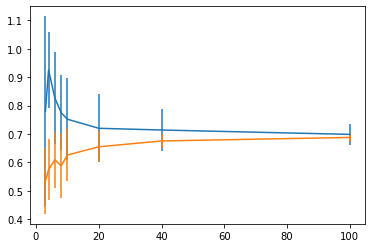

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.errorbar(P, Mean_acc_train, yerr=Std_acc_train)
ax.errorbar(P, Mean_acc_test, yerr=Std_acc_test)

Similar results for $w$: for larger $p$, there $w$ is less and less variation between the optimal $w$ for different generated data sets.